In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
ed2013 = pd.read_stata('ED2013-stata.dta', convert_categoricals=False, convert_missing=True)


In [3]:
# Display basic information from dataset
print(ed2013.info())

# Display descriptive statistics
print(ed2013.describe())

# Check for missing values
print(ed2013.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 24777 entries, 0 to 24776
Columns: 591 entries, VMONTH to EDWT
dtypes: int16(179), int32(37), int8(115), object(260)
memory usage: 64.0+ MB
None
             VMONTH         VDAYR      WAITTIME           LOV           AGE  \
count  24777.000000  24777.000000  24777.000000  24777.000000  24777.000000   
mean       6.334383      3.937805     36.382694    205.344069     37.807765   
std        3.453591      1.981420     70.247818    285.331943     23.962282   
min        1.000000      1.000000     -9.000000     -9.000000      0.000000   
25%        4.000000      2.000000      4.000000     75.000000     20.000000   
50%        6.000000      4.000000     17.000000    140.000000     35.000000   
75%        9.000000      6.000000     43.000000    240.000000     55.000000   
max       12.000000      7.000000   1227.000000   5760.000000     93.000000   

               AGER       AGEDAYS      RESIDNCE           SEX         ETHUN  \
count  24777.0

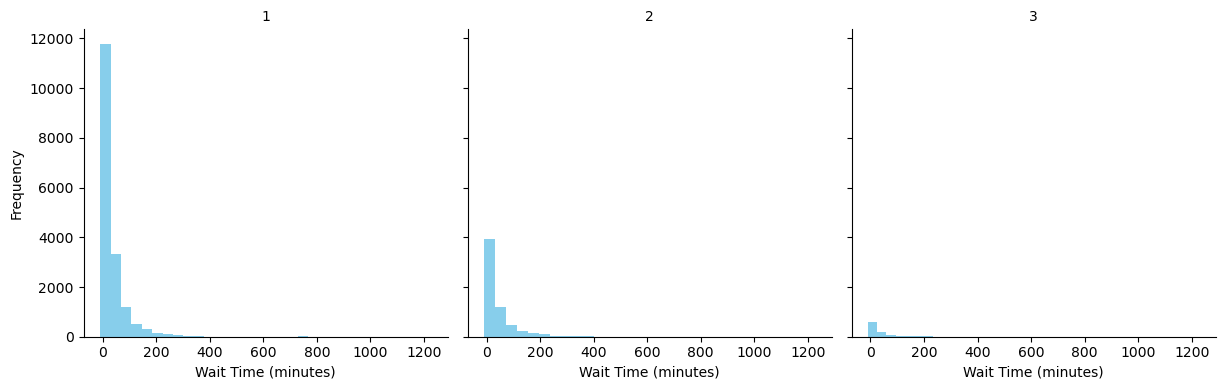

In [11]:
#Question 1: Do patients from racial minority groups wait longer?


g = sns.FacetGrid(ed2013, col='RACER', col_wrap=4, height=4)
g.map(plt.hist, 'WAITTIME', bins=30, color='skyblue')

# Add labels and title
g.set_axis_labels('Wait Time (minutes)', 'Frequency')
g.set_titles(col_template='{col_name}')



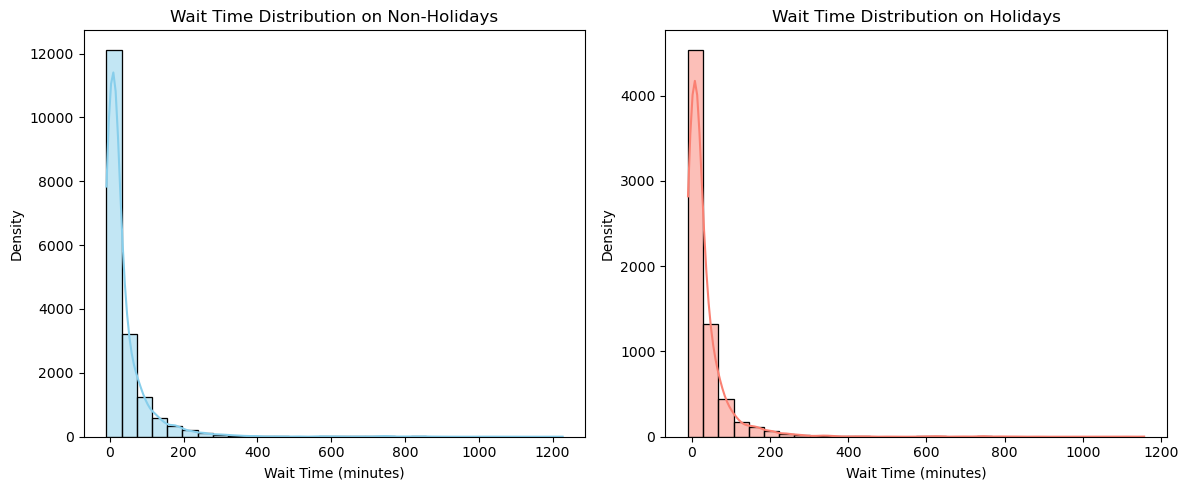

In [13]:
#Question 2: If wait times increase during holiday periods?

#Creating a list of holidays that include Sunday and Saturday
holiday_days = [1, 7]  # Sunday and Saturday are considered holidays

# Creating a new column 'IS_HOLIDAY' indicating whether the visit day is a holiday
ed2013['IS_HOLIDAY'] = ed2013['VDAYR'].isin(holiday_days)

# Setting up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plotting the histogram for wait times on non-holidays
sns.histplot(data=ed2013[ed2013['IS_HOLIDAY'] == False], x='WAITTIME', bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Wait Time Distribution on Non-Holidays')
axes[0].set_xlabel('Wait Time (minutes)')
axes[0].set_ylabel('Density')

# Plotting the histogram for wait times on holidays
sns.histplot(data=ed2013[ed2013['IS_HOLIDAY'] == True], x='WAITTIME', bins=30, kde=True, color='salmon', ax=axes[1])
axes[1].set_title('Wait Time Distribution on Holidays')
axes[1].set_xlabel('Wait Time (minutes)')
axes[1].set_ylabel('Density')

# Adjusting layout to prevent overlap
plt.tight_layout()

plt.show()

In [6]:
#Question 3: The five most important numeric variables and the five most important categorical variables that can predict how long a patient will wait.

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Selecting relevant features
numeric_features = ['ARRTIME', 'LOV', 'AGE', 'AGEDAYS', 'TEMPF', 'PULSE', 'RESPR', 'BPSYS', 'BPDIAS', 'POPCT', 'ONO2',
                   'PAINSCALE']
categorical_features = ['VMONTH', 'VDAYR', 'RESIDNCE', 'SEX', 'ETHIM', 'ARREMS', 'PAYPRIV', 'PAYMCARE', 'PAYMCAID', 
                        'PAYWKCMP', 'PAYSELF', 'PAYNOCHG', 'PAYOTH', 'PAYDK', 'IMMEDR', 'SEEN72', 'INJURY']

# Combining both numeric and categorical features
selected_features = numeric_features + categorical_features

# Creating a subset of the data with selected features
X = ed2013[selected_features]
y = ed2013['WAITTIME']

# Converting categorical variables to dummy/indicator variables
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Getting feature importances
feature_importances = model.feature_importances_

# Combining feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Displaying the top 5 numeric and categorical variables
top_numeric = feature_importance_df[feature_importance_df['Feature'].isin(numeric_features)].nlargest(5, 'Importance')
top_categorical = feature_importance_df[feature_importance_df['Feature'].isin(categorical_features)].nlargest(5, 'Importance')

print("Top 5 Numeric Variables:")
print(top_numeric)

print("\nTop 5 Categorical Variables:")
print(top_categorical)

Top 5 Numeric Variables:
   Feature  Importance
1      LOV    0.228665
0  ARRTIME    0.126288
5    PULSE    0.058547
2      AGE    0.056900
4    TEMPF    0.055358

Top 5 Categorical Variables:
Empty DataFrame
Columns: [Feature, Importance]
Index: []
